In [2]:
# primero nuestras librerias!

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# lo primero que hacemos es cargar el dataframe que vamos a usar para esta lección
df = pd.read_csv("world_data_full_apply_nulos.csv") 

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'density', 'abbreviation', 'agricultural_land',
       'land_area', 'armed_forces_size', 'birth_rate', 'calling_code',
       'capital/major_city', 'co2-emissions', 'cpi', 'cpi_change',
       'currency-code', 'fertility_rate', 'forested_area', 'gasoline_price',
       'gdp', 'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent'],
      dtype='object')

1. ¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [24]:
continent_cantidad = df.groupby('continent')['country'].count()
continent_cantidad

continent
Africa             53
Asia               45
Central America    20
Europe             47
North America       2
Oceania            14
South America      13
Name: country, dtype: int64

In [25]:
continent_cantidad.sum()

np.int64(194)

In [63]:
percentaje = round(continent_cantidad / continent_cantidad.sum() * 100, 2)
percentaje

continent
Africa             27.32
Asia               23.20
Central America    10.31
Europe             24.23
North America       1.03
Oceania             7.22
South America       6.70
Name: country, dtype: float64

Reseteamos index para transformar la serie en dataframe para que muestre la informacion que queremos exportar a la grafica

In [64]:
percentaje = percentaje.reset_index().sort_values('country', ascending=False)
percentaje

,continent,country
0,Africa,27.32
3,Europe,24.23
1,Asia,23.20
2,Central America,10.31
5,Oceania,7.22
6,South America,6.70
4,North America,1.03


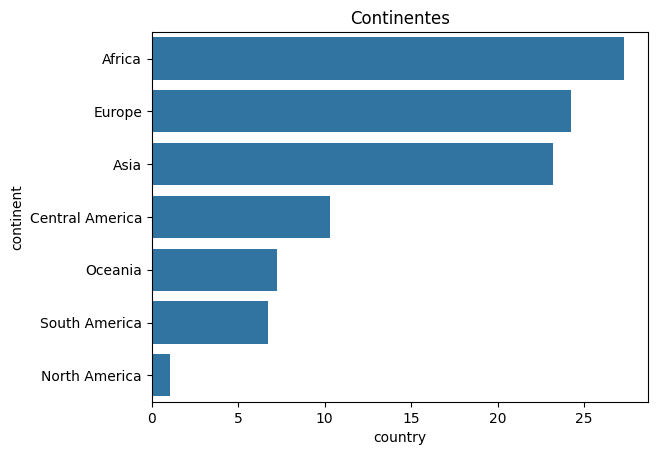

In [67]:
sns.barplot(data=percentaje, y='continent', x='country')
plt.title("Continentes");

2. ¿Cuáles son los 10 países con la mayor área forestal?

In [ ]:
# Numerico 
# Bivariado pues compara dos variables: paises y area forestal 
# Barplot: Muestra la relación entre una variable categórica y una variable numérica mediante barras
# boxplot: Muestra la distribución de una variable numérica para cada categoría en una variable categórica.    |

In [69]:
paises = df['country'].head(10)
paises

0            Afghanistan
1                Albania
2                Algeria
3                Andorra
4                 Angola
5    Antigua and Barbuda
6              Argentina
7                Armenia
8              Australia
9                Austria
Name: country, dtype: object

In [ ]:
# nuestro codigo:
paises = df.groupby('country')['forested_area'].sum().sort_values('forested_area', ascending=False)
paises

# df.groupby('country')['forested_area'].sum()` devuelve una **Serie**, no un **DataFrame**.
# El método `sort_values()` aplicado a una **Serie** no acepta el nombre de la columna como argumento, 
# porque una Serie **no tiene columnas** — solo tiene un **índice** (`country`) y los **valores** (`forested_area`).

In [77]:
# series
paises = df.groupby('country')['forested_area'].sum().sort_values(ascending=False)
top_10 = paises.head(10)
top_10


country
Suriname                          98.3
Federated States of Micronesia    91.9
Gabon                             90.0
Seychelles                        88.4
Palau                             87.6
Guyana                            83.9
Laos                              82.1
Solomon Islands                   77.9
Papua New Guinea                  74.1
Finland                           73.1
Name: forested_area, dtype: float64

In [78]:
# data frame
paises = df.groupby('country', as_index=False)['forested_area'].sum()
paises = paises.sort_values(by='forested_area', ascending=False)
top_10 = paises.head(10)
top_10


,country,forested_area
164,Suriname,98.3
56,Federated States of Micronesia,91.9
60,Gabon,90.0
151,Seychelles,88.4
128,Palau,87.6
69,Guyana,83.9
89,Laos,82.1
156,Solomon Islands,77.9
131,Papua New Guinea,74.1
58,Finland,73.1


3. ¿Cómo se distribuye la densidad de población entre los países?

4. ¿Existe una relación entre el PIB y la tasa de desempleo de los países?

5. ¿Cómo se relacionan la tasa de mortalidad infantil y la esperanza de vida?

Debes decidir que gráfica es más adecuada. 

Puedes utilizar cualquier gráfica vista hasta el momento: gráficas para variables numéricas, categóricas o relación entre ambas.

Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):
1. Todas deben llevar título.
2. Los nombres de los ejes deben estar en castellano.
3. En los scatterplot los puntos deben tener un tamaño de 2.
4. En los scatterplot los puntos deben tener un color diferente al azul.
5. En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.
6. En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.
7. En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.

📊 Tabla de Gráficos com Seaborn e Matplotlib

In [ ]:
# pedi para Chatgpt hacer una tabla con la info que Cesar nos dijo

| Gráfico         | Tipo de variable           | Nº de variables | Uso típico                                                  | Función Seaborn / Matplotlib     |
|----------------|----------------------------|------------------|--------------------------------------------------------------|----------------------------------|
| **Histograma** | Numérica (cuantitativa)    | Univariada       | Distribución de frecuencia de una variable numérica          | `sns.histplot()`                 |
| **Countplot**  | Categórica                 | Univariada       | Conteo de ocurrencias por categoría                          | `sns.countplot()`                |
| **Barplot**    | Categórica + Numérica      | Bivariada        | Comparar medias (o sumas) de una variable numérica por grupo | `sns.barplot()`                  |
| **Boxplot**    | Numérica + Categórica      | Bivariada        | Distribución, mediana y valores atípicos por categoría       | `sns.boxplot()`                  |
| **Scatterplot**| Numérica + Numérica        | Bivariada        | Relación entre dos variables numéricas (correlación)         | `sns.scatterplot()`              |
| **Gráfico de Tarta** | Categórica            | Univariada       | Proporción relativa entre categorías                        | `plt.pie()` (con Matplotlib)     |
